In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.1.0'

In [3]:
helli = tf.constant("Hello, Tensorflow")

# Tensorflow의 구동원리

- Tensorflow는 tensor라고하는 데이터(edge)가 operation등이 들어있는 Node를 통해 흐른다고 하여 Tensorflow라고한다. 따라서 Edge와 Node가 있는 Graph로 작동한다.
- 따라서 위와같이 tf.constant를 해서 NOde를 만들더라도 단순히 print하여도 원하는 값이 나오지 않고,node의 실행을 위한 Session이 필요하다. 
- 따라서 먼저 Graph를 구성하고 Session을 통해서 Graph를 실행하는 것이 가장 큰 틀이라고 할 수 있다.


In [4]:
sess = tf.Session()
print(sess.run(helli))

b'Hello, Tensorflow'


In [5]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

In [6]:
print("node1 : ", node1, "node2 : ", node2, "node3 : ", node3)

node1 :  Tensor("Const_1:0", shape=(), dtype=float32) node2 :  Tensor("Const_2:0", shape=(), dtype=float32) node3 :  Tensor("Add:0", shape=(), dtype=float32)


In [7]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3) : ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3) :  7.0


In [8]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict = {a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict = {a: [1, 3], b: [2, 4]}))

7.5
[ 3.  7.]


# 간단한 Linear Regression


## hypothesis and cost function
- H(x) = Wx + b
- minimize cost(W,b)

1. H(x) = Wx + b

In [9]:
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

#Variable은 tensorflow가 사용하는 Variable이다
#tf.random_normal([1]) rank가 1인(scalar) 랜덤한 숫자를 만든다.
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#Our hypothesis XW + b
hypothesis = x_train * W + b

2. cost(W,b) = 1/m*summation(H(x)-y)^2

In [10]:
#cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

GradientDescent

In [11]:
#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

In [12]:
# Launch the graph in a session
sess = tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

#fit the Line
for step in range(2001):
    sess.run(train)
    # 경사 하강법 20회에 한번씩 출력
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 0.460292 [ 0.90256619] [-0.47889996]
20 0.0213899 [ 1.12858021] [-0.35898384]
40 0.0158303 [ 1.1436224] [-0.33283764]
60 0.0143447 [ 1.13888049] [-0.31631243]
80 0.0130278 [ 1.13254464] [-0.30136275]
100 0.0118321 [ 1.12633371] [-0.28719181]
120 0.0107461 [ 1.12039816] [-0.27369407]
140 0.00975976 [ 1.11474013] [-0.26083139]
160 0.00886396 [ 1.10934782] [-0.24857323]
180 0.00805039 [ 1.10420883] [-0.23689124]
200 0.00731151 [ 1.09931147] [-0.22575827]
220 0.00664043 [ 1.09464419] [-0.21514843]
240 0.00603094 [ 1.09019625] [-0.20503725]
260 0.0054774 [ 1.08595729] [-0.19540125]
280 0.00497466 [ 1.08191776] [-0.1862182]
300 0.00451807 [ 1.07806778] [-0.17746663]
320 0.00410339 [ 1.07439899] [-0.16912636]
340 0.00372675 [ 1.07090235] [-0.16117802]
360 0.0033847 [ 1.06757033] [-0.15360326]
380 0.00307404 [ 1.06439471] [-0.14638443]
400 0.00279189 [ 1.06136847] [-0.13950488]
420 0.00253564 [ 1.0584842] [-0.13294852]
440 0.0023029 [ 1.05573559] [-0.12670034]
460 0.00209153 [ 1.05311632] [-

In [13]:
#placeholders를 사용해봅시다
#placeholders를 이용하면 먼저 알고리즘을 만들고 나중에 데이터를 집어넣기 용이하다. 
#Shape = [None]는 몇차원데이터든 상관없다 이경우 2
X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#Our hypothesis XW + b
hypothesis = X * W + b
#cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)


sess = tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X: [1, 2, 3, 4, 5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)
    

0 0.655782 [ 0.90261871] [ 0.59413648]
20 0.0314573 [ 1.11412919] [ 0.68408448]
40 0.0274608 [ 1.10758126] [ 0.71157986]
60 0.0239818 [ 1.10053992] [ 0.73701894]
80 0.0209434 [ 1.09395552] [ 0.76079077]
100 0.0182901 [ 1.08780217] [ 0.78300583]
120 0.0159729 [ 1.08205199] [ 0.80376601]
140 0.0139492 [ 1.0766784] [ 0.82316661]
160 0.012182 [ 1.07165682] [ 0.84129655]
180 0.0106386 [ 1.06696379] [ 0.85823929]
200 0.00929076 [ 1.06257832] [ 0.87407237]
220 0.00811369 [ 1.05848002] [ 0.88886851]
240 0.00708577 [ 1.05465019] [ 0.9026956]
260 0.00618805 [ 1.05107105] [ 0.91561723]
280 0.00540406 [ 1.04772639] [ 0.92769259]
300 0.0047194 [ 1.04460073] [ 0.93897718]
320 0.00412149 [ 1.04167986] [ 0.94952273]
340 0.00359933 [ 1.03895009] [ 0.95937759]
360 0.00314332 [ 1.03639925] [ 0.9685871]
380 0.00274508 [ 1.03401542] [ 0.97719347]
400 0.0023973 [ 1.03178775] [ 0.98523617]
420 0.00209358 [ 1.02970588] [ 0.99275219]
440 0.00182834 [ 1.02776051] [ 0.99977595]
460 0.0015967 [ 1.02594244] [ 1.00

In [14]:
# testing our model
print(sess.run(hypothesis, feed_dict = {X: [5]}))
print(sess.run(hypothesis, feed_dict = {X: [2.5]}))
print(sess.run(hypothesis, feed_dict = {X: [1.5, 3.5]}))

[ 6.10019588]
[ 3.59984398]
[ 2.59970331  4.59998512]


# Minimizing Cost
- gradient descent

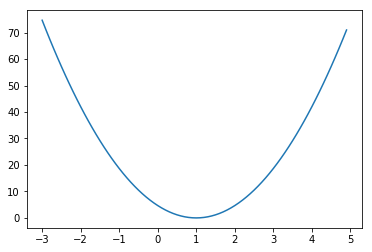

In [15]:
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]
W= tf.placeholder(tf.float32)
hypothesis = X * W
#cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
#Launch the graph in the graph
sess = tf.Session()
#Initialize global variables in the graph
sess.run(tf.global_variables_initializer())
#비용함수 그리기 위한 변수들을 위한 list 생성
W_val = []
cost_val = []
for i in range(-30, 50):
    #(-3,5)구간에서 plotting
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
# 비용함수 plotting
plt.plot(W_val, cost_val)
plt.show()

## 경사하강법
경사를 이용하기 위해 미분한다

In [16]:
# W -= Learning_rate * derivative of cost function
W = tf.Variable(tf.random_normal([1]), name = 'weight')
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
#tensorflow 에서는 -=를 통해서 업데이트가 안되므로 assigin()이용
update = W.assign(descent)

## 전체 코드

In [17]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]
W= tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# our Hypothesis for linear model (simplified) X * W
hypothesis = X * W
# cost/ Loss Function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#minimize 
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

#launch the graph in a session
sess = tf.Session()
# initialize global function variable in the graph
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict = {X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 0.0277496 [ 0.92288744]
1 0.00789324 [ 0.95887327]
2 0.00224519 [ 0.97806573]
3 0.000638636 [ 0.98830169]
4 0.000181657 [ 0.99376088]
5 5.16716e-05 [ 0.99667245]
6 1.4697e-05 [ 0.99822533]
7 4.18088e-06 [ 0.99905348]
8 1.1892e-06 [ 0.99949521]
9 3.38305e-07 [ 0.99973077]
10 9.62316e-08 [ 0.99985641]
11 2.73853e-08 [ 0.99992341]
12 7.7843e-09 [ 0.99995917]
13 2.21138e-09 [ 0.99997824]
14 6.29045e-10 [ 0.99998838]
15 1.79322e-10 [ 0.9999938]
16 4.97629e-11 [ 0.99999672]
17 1.41505e-11 [ 0.99999827]
18 3.62495e-12 [ 0.99999911]
19 1.06108e-12 [ 0.99999952]
20 2.65269e-13 [ 0.99999976]


## tensorflow에서의 GradientDescent

In [18]:
X = [1, 2, 3]
Y = [1, 2, 3]
W = tf.Variable(70.0)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
#tensorflow에서는 메소드로 존재한다. 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)
                        

sess = tf.Session()
sess.run(tf.global_variables_initializer())
                                
for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 70.0
1 5.6
2 1.30667
3 1.02044
4 1.00136
5 1.00009
6 1.00001
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [19]:
#tensorflow 안에서 grdient를 손대고 싶을 떄 사용하는 방법
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)
hypothesis = X * W

#직접 구한 gradient값
gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

#Gradient값을 얻는다.
gvs = optimizer.compute_gradients(cost,[W])

#Gradient 적용
apply_gradient = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradient)

0 [37.333332, 5.0, [(37.333332, 5.0)]]
1 [33.848888, 4.6266665, [(33.848888, 4.6266665)]]
2 [30.689655, 4.2881775, [(30.689655, 4.2881775)]]
3 [27.825289, 3.981281, [(27.825289, 3.981281)]]
4 [25.228264, 3.7030282, [(25.228264, 3.7030282)]]
5 [22.873627, 3.4507456, [(22.873627, 3.4507456)]]
6 [20.738754, 3.2220094, [(20.738754, 3.2220094)]]
7 [18.803141, 3.014622, [(18.803141, 3.014622)]]
8 [17.04818, 2.8265905, [(17.048178, 2.8265905)]]
9 [15.457016, 2.6561089, [(15.457016, 2.6561089)]]
10 [14.014363, 2.5015388, [(14.014362, 2.5015388)]]
11 [12.706355, 2.3613951, [(12.706355, 2.3613951)]]
12 [11.520428, 2.2343316, [(11.520428, 2.2343316)]]
13 [10.445188, 2.1191273, [(10.445188, 2.1191273)]]
14 [9.4703045, 2.0146754, [(9.4703045, 2.0146754)]]
15 [8.5864086, 1.9199723, [(8.5864077, 1.9199723)]]
16 [7.7850103, 1.8341082, [(7.7850103, 1.8341082)]]
17 [7.0584097, 1.7562581, [(7.0584097, 1.7562581)]]
18 [6.3996248, 1.6856741, [(6.3996248, 1.6856741)]]
19 [5.8023272, 1.6216779, [(5.8023272, 